In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
def Bernoulli_MF(X, Delta, K, ):
    """
    X: X_n
    """

    # below_Delta = X < Delta
    # above_Delta = ~below_Delta
    X_1 = (2/(1+Delta) * (X+1)-1) * (X < Delta) + (2/(1-Delta) * (X-1)+1 )* (X >= Delta)

    S = np.sign(Delta-X)
    sigma = S.mean()
    Delta = K * sigma * (1-sigma**2)
    return X_1, Delta, sigma


In [128]:
L=100

K=0.1
# S_list = []
# X_list = []

def run_bernoulli_mf(K, L=100, seed=0):
    rng = np.random.default_rng(seed)
    X=np.random.uniform(-1,1,L)
    Delta=0.0
    for idx in range(L):
        X,Delta, S = Bernoulli_MF(X, Delta, K=K)
        # S_list.append(S)
        # X_list.append(X.copy())
    return S

In [129]:
run_bernoulli_mf(K=0.1, L=100,)

np.float64(-0.08)

In [214]:
K_list = np.arange(0.1,2.5,0.1)
seed_list = np.arange(1000)
results = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(run_bernoulli_mf)(K=K,seed=seed) for K in K_list for seed in seed_list)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


0.03s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.03s - Debugger warning: It seems that frozen modules are being used, which may
0.01s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.02s - Debugger warning: It seems that frozen modules are being used, which may
0

In [133]:
results = np.array(results).reshape(len(K_list), len(seed_list))


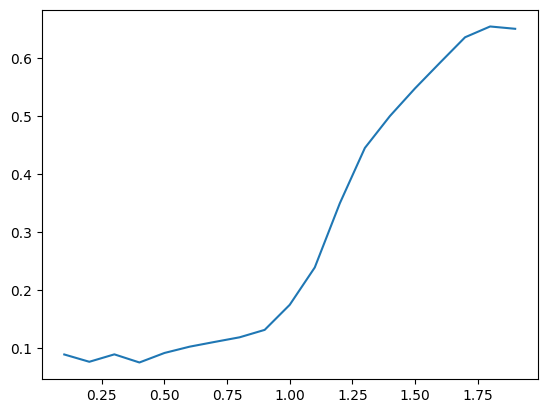

In [139]:
plt.plot(K_list,np.abs(results).mean(axis=1))

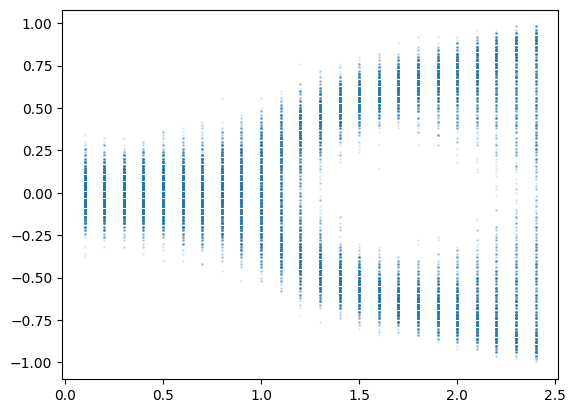

In [215]:
K_list_=[K for K in K_list for seed in seed_list]
plt.scatter(K_list_, results, s=1, alpha=0.1)

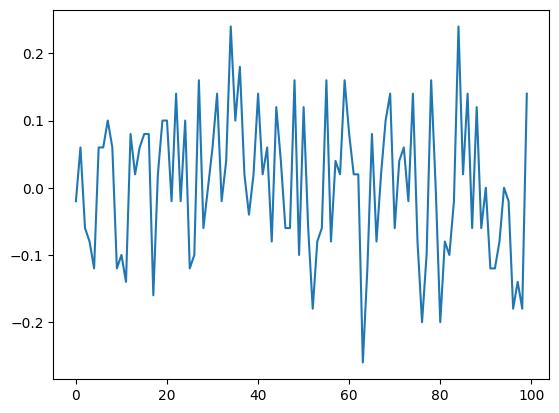

In [119]:
plt.plot(S_list, )

In [111]:
Delta

np.float64(-0.520128)

In [105]:
(X)

array([-0.25, -1.  , -0.25,  0.  , -0.25,  0.75, -0.5 , -0.25, -0.75,
        0.25, -1.  , -0.25, -0.25, -0.75, -0.25, -0.5 ,  0.75, -1.  ,
        0.25,  0.75,  0.25,  0.  , -0.5 , -0.25, -0.75, -0.25, -0.5 ,
        0.25,  0.75, -0.25, -1.  ,  0.  ,  0.5 , -0.25, -0.75, -0.5 ,
        0.  , -0.75, -0.25, -0.75, -0.25,  0.  ,  0.  ,  0.25,  0.  ,
        0.5 ,  0.5 , -0.75, -0.5 ,  0.25])

/tmp/ipykernel_1097079/3031622817.py:3: RuntimeWarning: invalid value encountered in power
  sigma_list = (1-1/np.sinh(K_list/2)**4)**(1/8)


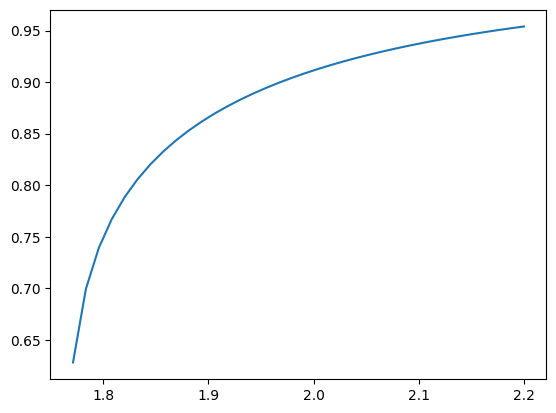

In [6]:
fig,ax=plt.subplots()
K_list = np.linspace(1.6,2.2)
sigma_list = (1-1/np.sinh(K_list/2)**4)**(1/8)
ax.plot(K_list,sigma_list)

In [10]:
z=np.arange(16).reshape((4,4))

In [16]:
np.roll(z,1,axis=0)

array([[12, 13, 14, 15],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [2]:
%load_ext line_profiler

In [36]:
def Bernoulli_bare(X, Delta , K, S, even =True):
    """
    X: X_n
    Delta: Delta_n
    """
    X_1 = (2/(1+Delta) * (X+1)-1) * (X < Delta) + (2/(1-Delta) * (X-1)+1 )* (X >= Delta)
    S = np.sign(Delta-X)
    # sigma = S.mean()

    Delta = np.tanh(K/4 * (np.roll(S,-1,axis=0) + np.roll(S,1,axis=0) + np.roll(S,-1,axis=1) + np.roll(S,1,axis=1)) )

    return X_1, Delta, S


In [ ]:
def Bernoulli(X, Delta , K, S, even =True):
    """
    X: X_n
    Delta: Delta_n
    """
    mask_ = np.array([True,False]*(X.shape[0]//2))
    if even:
        mask = mask_[:, None] ^ mask_
    else:
        mask = ~ (mask_[:, None] ^ mask_)
    X_1 = X.copy()
    X_1[mask] = (2/(1+Delta[mask]) * (X[mask]+1)-1) * (X[mask] < Delta[mask]) + (2/(1-Delta[mask]) * (X[mask]-1)+1 )* (X[mask] >= Delta[mask])
    S[mask] = np.sign(Delta[mask]-X[mask])
    # sigma = S.mean()

    Delta[mask] = np.tanh(K/4 * (np.roll(S,-1,axis=0)[~mask] + np.roll(S,1,axis=0)[~mask] + np.roll(S,-1,axis=1)[~mask] + np.roll(S,1,axis=1)[~mask]) )

    return X_1, Delta, S


In [221]:
z=np.array([True,False]*10)

In [ ]:
plt.pcolormesh(~(z[:, None] ^ z))

In [ ]:
plt.pcolormesh((z[:, None] ^ z))

In [3]:
L=100
X=np.random.uniform(-1,1,(L,L))
# X=np.ones((L,L))*0.4
Delta=np.random.uniform(-.1,.1,(L,L))
K=2

In [ ]:
%lprun -f Bernoulli Bernoulli(X,Delta,K)

In [ ]:
%lprun -f Bernoulli S_list = run(K=2)

In [55]:
def run(K, tf=None, L=50, seed=0, func=Bernoulli):
    if tf is None:
        tf = L**2
    rng = np.random.default_rng(seed)
    X=rng.uniform(-1,1,(L,L))
    Delta = np.zeros((L,L))
    S = np.zeros((L,L))
    # Delta=np.random.uniform(-.1,.1,(L,L))
    # S_list = []
    # sigma_list = []
    for idx in range(tf):

        X,Delta, S = func(X,Delta,K,S, even= idx%2)
        # sigma_list.append(S.mean())
    
    return S.mean()
    # return sigma_list

In [54]:
run(K=2.1,seed=None)

np.float64(0.0048)

In [56]:
S_list = run(K=1.1,seed=0, func=Bernoulli)

In [43]:
S_list_bare = run(K=1.1,seed=0)

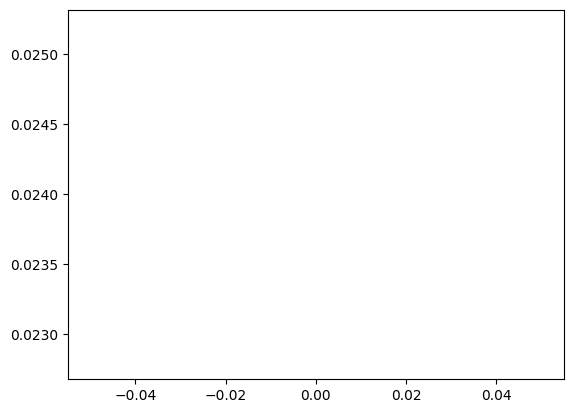

In [57]:
plt.plot(S_list)

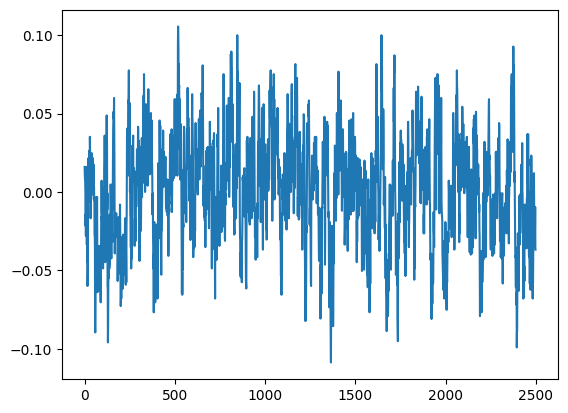

In [44]:
plt.plot(S_list_bare)

In [33]:
import joblib

In [76]:
K_list = np.arange(1.,2,0.1)
seed_list = np.arange(100)
results = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(run)(K=K,seed=seed, func=Bernoulli,L=100) for K in K_list for seed in seed_list)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 48.3min finished


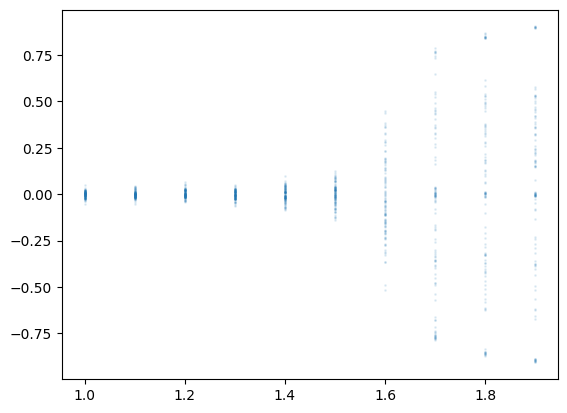

In [77]:
K_list_=[K for K in K_list for seed in seed_list]
plt.scatter(K_list_, results, s=1, alpha=0.1)

(1.2, 2.2)

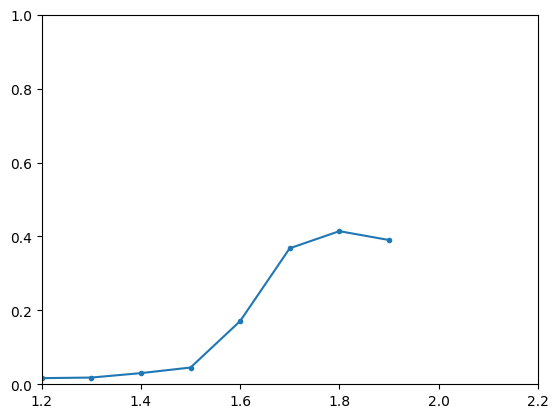

In [78]:
plt.plot(K_list,np.abs(np.array(results).reshape(K_list.shape[0],seed_list.shape[0])).mean(axis=1),'.-')
plt.ylim(0,1)
plt.xlim(1.2,2.2)

In [75]:
K_list = np.arange(1.,2,0.1)
seed_list = np.arange(100)
results_bare = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(run)(K=K,seed=seed, func=Bernoulli_bare,L=100) for K in K_list for seed in seed_list)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
0.04s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.05s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.04s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.05s

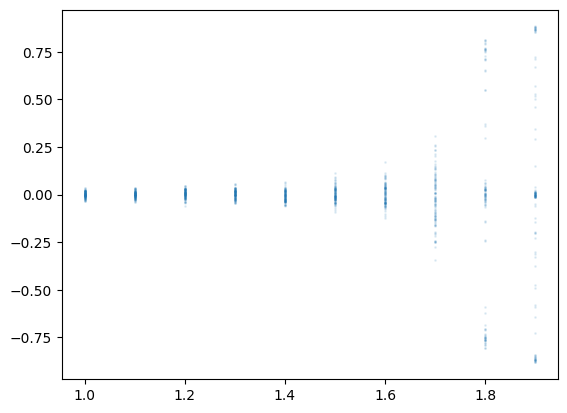

In [79]:
K_list_=[K for K in K_list for seed in seed_list]
plt.scatter(K_list_, results_bare, s=1, alpha=0.1)

(1.2, 2.2)

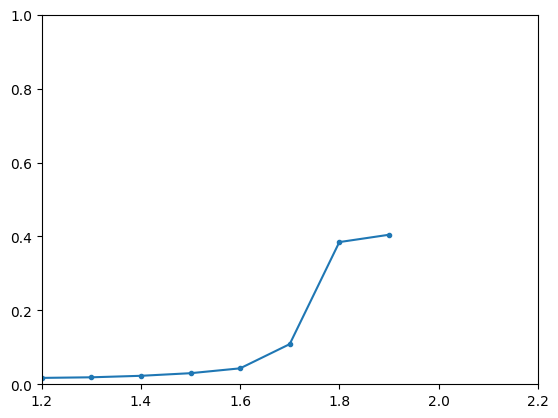

In [80]:
plt.plot(K_list,np.abs(np.array(results_bare).reshape(K_list.shape[0],seed_list.shape[0])).mean(axis=1),'.-')
plt.ylim(0,1)
plt.xlim(1.2,2.2)

In [62]:
results = np.array(results).reshape(len(K_list), len(seed_list))


In [63]:
np.array(results).shape

(10, 10)

In [65]:
results

array([[ 4.000e-03,  3.200e-03,  1.400e-02, -2.060e-02,  9.800e-03,
        -3.200e-03, -3.800e-03, -5.000e-03,  3.000e-03,  1.820e-02],
       [ 1.740e-02, -5.400e-03,  1.020e-02,  2.900e-02, -3.200e-03,
        -1.800e-02,  3.680e-02,  1.220e-02,  1.960e-02, -2.940e-02],
       [ 4.800e-03,  5.600e-03, -3.800e-03, -2.400e-03, -1.660e-02,
        -1.080e-02,  8.200e-03, -4.200e-03,  2.700e-02,  1.480e-02],
       [ 5.400e-03, -3.060e-02,  2.400e-03,  2.340e-02, -1.180e-02,
         1.680e-02,  1.100e-02, -1.540e-02,  2.300e-02,  1.160e-02],
       [ 1.640e-02, -3.040e-02,  1.780e-02, -2.960e-02, -1.760e-02,
         1.060e-02, -2.440e-02,  3.440e-02, -9.400e-03, -1.740e-02],
       [ 3.560e-02, -9.800e-03, -4.340e-02,  7.720e-02, -2.440e-02,
         2.580e-02, -2.740e-02,  2.380e-02, -3.820e-02,  1.940e-02],
       [-2.360e-02, -1.008e-01, -7.360e-02,  2.260e-02, -3.680e-02,
        -2.420e-02,  3.760e-02, -1.040e-02, -1.620e-02, -4.540e-02],
       [ 1.764e-01,  3.960e-02, -3.140e-0

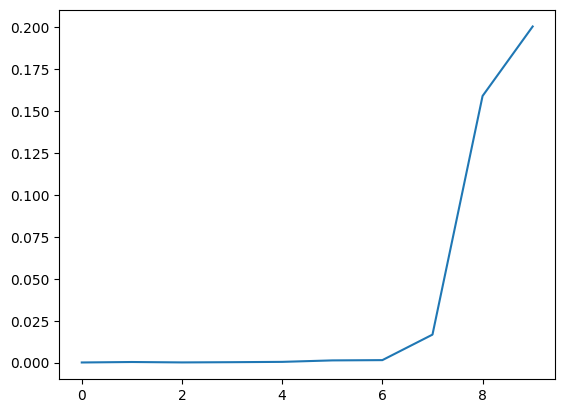

In [67]:
plt.plot(results.var(axis=1))

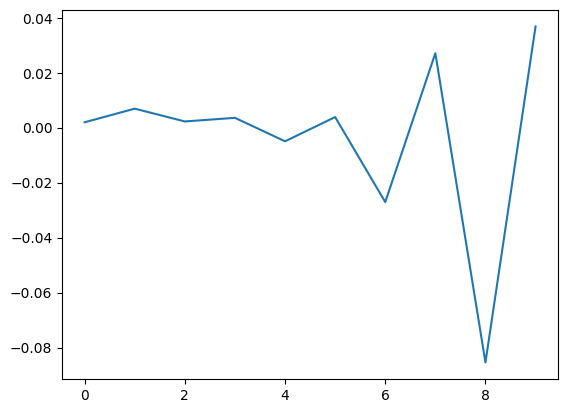

In [66]:
plt.plot(results.mean(axis=1))

In [ ]:
run(K=k_list, )

In [173]:
S_list[-1].mean()

np.float64(0.5982)

In [9]:
(1-1/np.sinh(2*np.log(1+np.sqrt(2))/2)**4)**(1/8)

np.float64(0.0)

In [60]:
def rules(s,K):
    return K*s*(1-s**2)
def trajectory(s,K,n):
    x = np.zeros(n)
    x[0] = s
    for i in range(1,n):
        x[i] = rules(x[i-1],K)
    return x

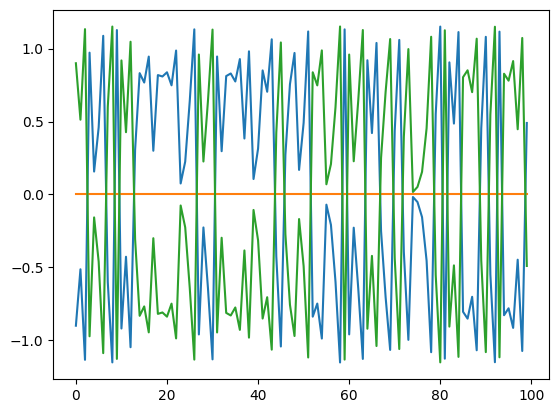

In [61]:
for s in np.linspace(-0.9,0.9,3):
    plt.plot(trajectory(s,3,100))

In [62]:
def Bernoulli(x,Delta):

    return (2/(1+Delta)*(x+1)-1) * (x < Delta) + (2/(1-Delta)*(x-1)+1) * (x > Delta)
    # if -1 < x < Delta:
    #     return 2/(1+Delta)*(x+1)-1
    # else:
    #     return 2/(1-Delta)*(x-1)+1

In [65]:
(Bernoulli(x,0.)>0).sum()

np.int64(506)

In [64]:
x=np.random.rand(1000)*2-1

In [8]:
Delta = np.random.rand(1000)*2-1

In [66]:
K=1.4
sigma_list=[]
for i in range(1000):
    x=Bernoulli(x,Delta)
    S=(x<Delta)*(1)+(x>=Delta)*(-1)
    sigma= S.mean()
    Delta=K*sigma*(1-sigma**2)
    sigma_list.append(sigma)
    # x=x


ValueError: operands could not be broadcast together with shapes (100,100) (1000,) 

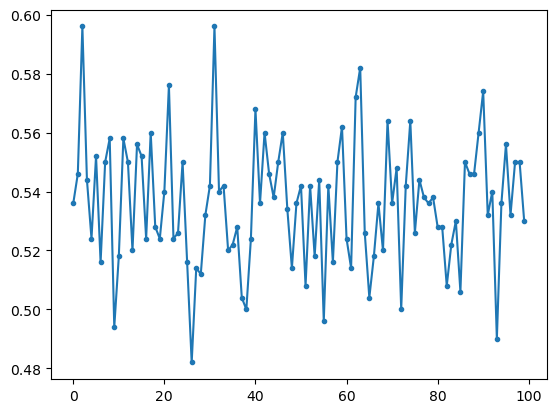

In [18]:
plt.plot(sigma_list[-100:],'.-')

In [95]:
np.sqrt(1-1/K)

0.816496580927726